## Analysis:


- The investigation by Pymaceuticals on potential treatments for squamous cell carcinoma (SCC) in animals includes a detailed analysis of 249 mice given different drug regimens for 45 days. The main objective is to ascertain Pymaceuticals' Capomulin's effectiveness with alternative treatments. 
Several crucial data analysis tasks are included in the research, including data preparation, the collection of summary statistics, and the creation of several visualizations, such as box plots, scatter plots, pie charts, bar charts, and line plots. The research looks at the relationship between tumor volume and mouse weight and the evolution of tumor volume about four potential treatments: Capomulin, Ramicane, Infubinol, and Ceftamin. 
Key images compare the distribution of mice gender, the measurement frequencies between drug regimes, and the final tumor sizes between groups for therapy.
 
- Calculating metrics for tumor volumes, such as mean, median, variance, standard deviation, and standard error of the mean, as well as doing correlation and regression analysis and looking for potential outliers, are all included in statistical analysis. The study aims to provide information on the effectiveness of several drug regimens, particularly Capomulin, as well as the effects of treatment duration and mouse features on tumor growth and any unexpected trends in the data. 

- It is stated that Pymaceuticals' future research objectives and potential drug development strategies for SCC therapy will be informed by these findings.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress



#study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#print(mouse_metadata.columns)
#print(study_results.columns)




#combine the data into a single DataFrame
data = pd.merge(study_results,mouse_metadata,how="left",on = ["Mouse ID"]) 


#Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
#checking the number of mice
number_of_mice = mouse_metadata['Mouse ID'].nunique()
number_of_mice


249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = data[data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
unique_duplicate_ids = duplicate_mice['Mouse ID'].unique()
unique_duplicate_ids

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data[data["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_dataframe = clean_df['Mouse ID'].nunique()
clean_dataframe

248

<H1>Summary Statistics</H1>

In [7]:
print(clean_df.dtypes)
#If the tumor volume column is not numeric, you can convert it:


#print(clean_df['Tumor Volume (mm3)'].isnull().sum())  # Count NaN values
#clean_df['Tumor Volume (mm3)'] = pd.to_numeric(clean_df['Tumor Volume (mm3)'], errors='coerce')


Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sds = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the results into a DataFrame
summary_df = pd.DataFrame({
    "Mean Tumor Volume": means,
    "Median Tumor Volume": medians,
    "Tumor Volume Variance": variances,
    "Tumor Volume Std. Dev.": sds,
    "Tumor Volume Std. Err.": sems
})

# Display the summary DataFrame
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
agg_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [10]:
agg_df = clean_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

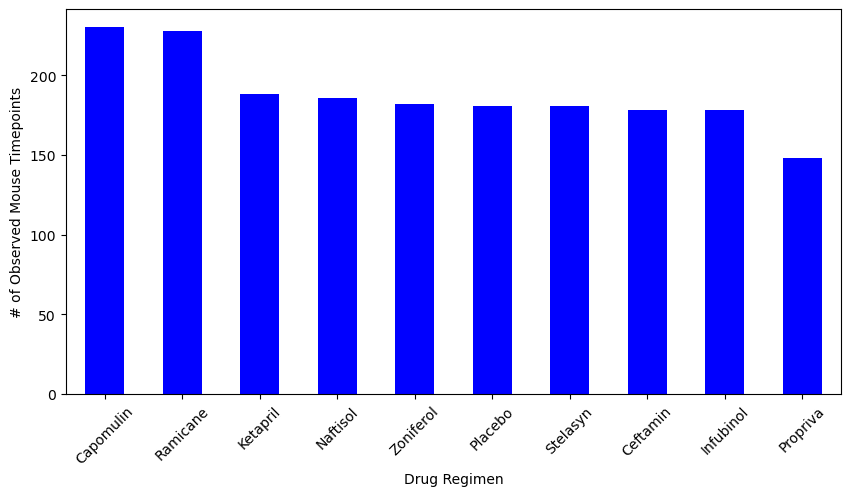

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_df.groupby('Drug Regimen')['Mouse ID'].count()
drug_counts_sorted = drug_counts.sort_values(ascending=False)

drug_counts_sorted.plot(kind='bar', figsize=(10, 5), color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

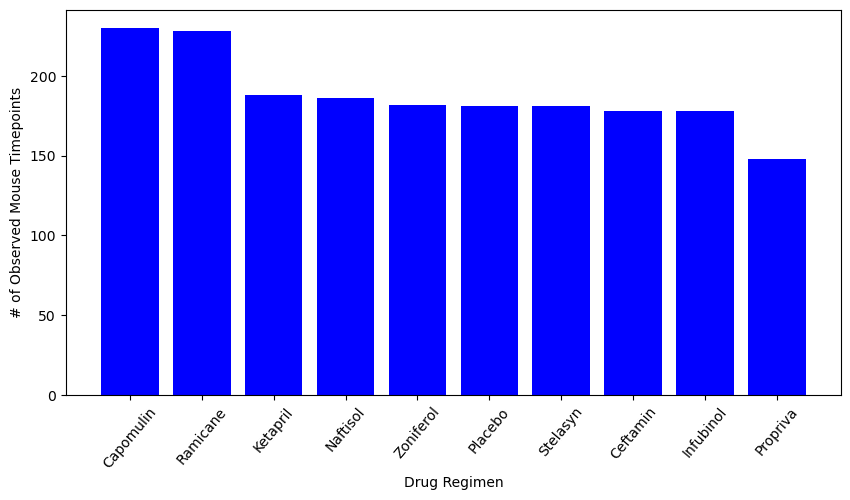

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_df.groupby('Drug Regimen')['Mouse ID'].count()
drug_counts_sorted = drug_counts.sort_values(ascending=False)

# Create a bar plot using pyplot
plt.figure(figsize=(10, 5))
plt.bar(drug_counts_sorted.index, drug_counts_sorted.values, color='blue')
#plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=50)
plt.show()


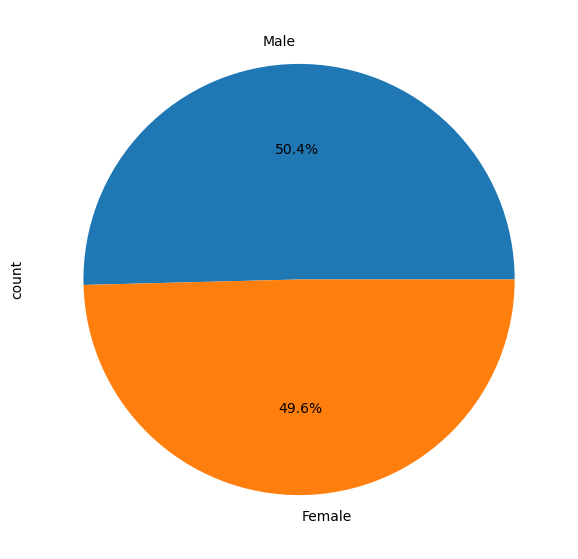

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_df[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique female and male mice
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=360,figsize=(7, 7))

# Make the pie chart
plt.show()


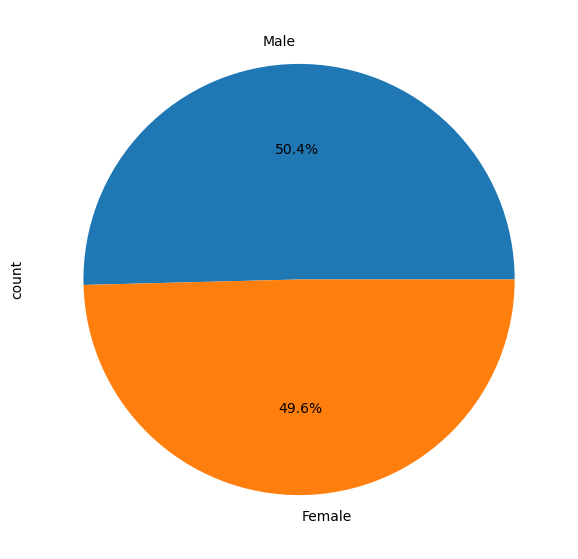

In [17]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice = clean_df[['Mouse ID', 'Sex']].drop_duplicates()

# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
#plt.figure(figsize=(7, 7))
fig, ax = plt.subplots(figsize=(7, 7))


plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=360)
ax.set_ylabel('count')


plt.show()


## Quartiles,Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_df = pd.merge(last_timepoint,clean_df, on=['Mouse ID','Timepoint'])


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_data=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_df[final_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset
    tumor_data.append(tumor_volumes)
    
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    
    # Calculate IQR
    
    IQR = Q3 - Q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
   # print(f"  Potential Outliers: {outliers.tolist()}\n")
    print(f"{treatment}'s potential outliers: {outliers}")





Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\16692\AppData\Local\Temp\ipykernel_46164\559321853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Drug Regimen']=pd.Categorical(filtered_df['Drug Regimen'],categories=drug_regimens,ordered=True)


<Figure size 800x600 with 0 Axes>

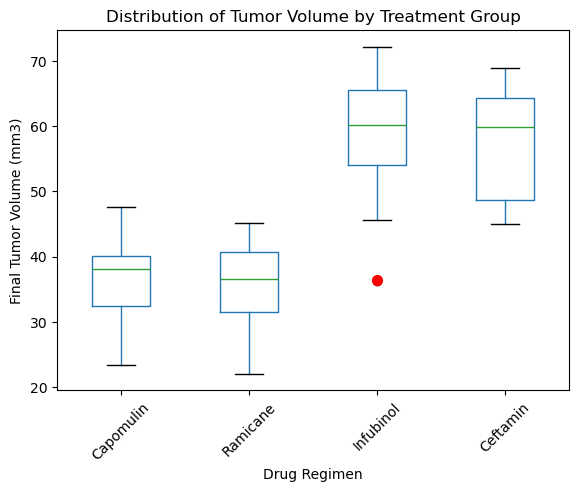

In [24]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
drug_regimens= ['Capomulin','Ramicane','Infubinol','Ceftamin']
filtered_df =final_df[final_df['Drug Regimen'].isin(drug_regimens)]
filtered_df['Drug Regimen']=pd.Categorical(filtered_df['Drug Regimen'],categories=drug_regimens,ordered=True)
filtered_df=filtered_df.sort_values('Drug Regimen')

plt.figure(figsize=(8, 6))
filtered_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False)

#step 3:Add red dot in Infubinol group
infubinol_point=36.5
plt.scatter(3,infubinol_point, color='red', s=50, zorder=3)

# Customize the plot
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.suptitle('')  # Suppress the default title to keep it clean
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability



# Step 4: Show the plot
plt.show()


Line and Scatter Plots

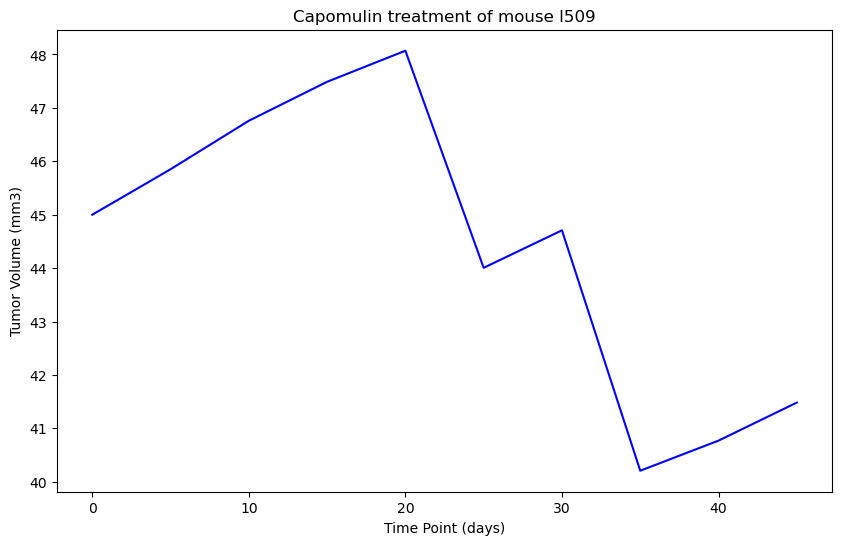

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'  # Replace with the Mouse ID you want to plot
capomulin_data = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == 'Capomulin')]

# Step 2: Generate a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], linestyle='-', color='b')

# Step 3: Customize the plot
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
#plt.xticks(capomulin_data['Timepoint'])  # Set x-ticks to the actual time points

plt.show()



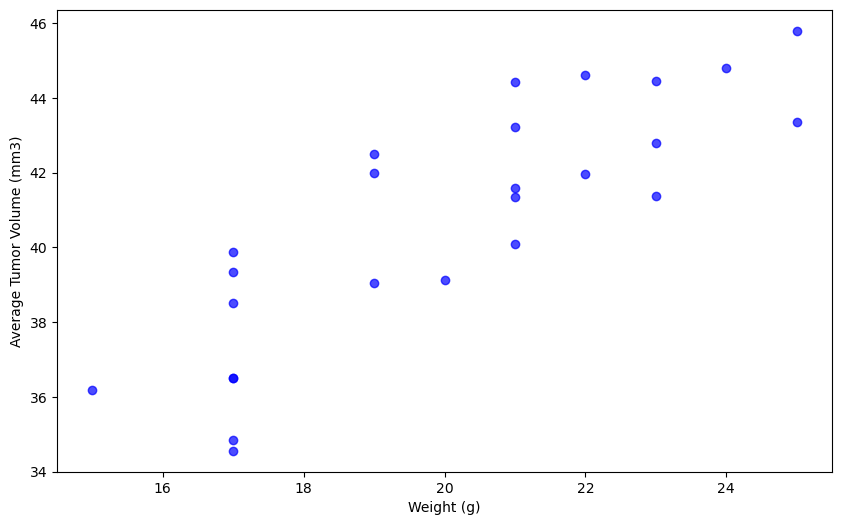

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Step 2: Calculate the average tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()

# Step 3: Generate a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='b', alpha=0.7)

# Step 4: Customize the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Step 5: Show the plot
plt.show()


## Correlation and Regression

The Correlation between mouse weight and the average tumor volume is 0.8419363424694722


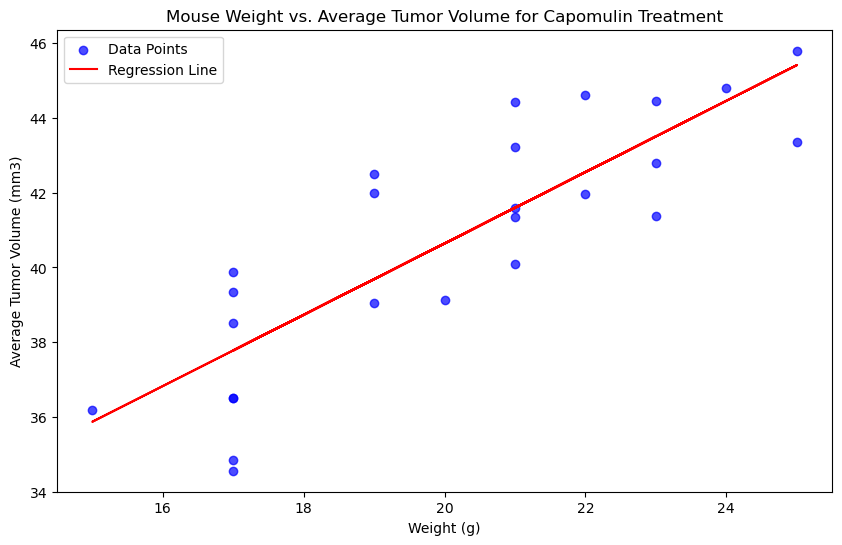

In [63]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()

# Calculate the correlation coefficient
correlation_coefficient = average_tumor_volume['Weight (g)'].corr(average_tumor_volume['Tumor Volume (mm3)'])
print(f"The Correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])

# Create a linear regression line
regression_line = slope * average_tumor_volume['Weight (g)'] + intercept

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='b', alpha=0.7, label='Data Points')
plt.plot(average_tumor_volume['Weight (g)'], regression_line, color='r', label='Regression Line')

plt.xlabel('Weight (g)')

plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()


#Show the plot
plt.show()
